<a href="https://colab.research.google.com/github/prikshit-2000/Tensorflow/blob/main/Sailency_Map_Siberian_Husky.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as  plt
import cv2
import PIL

import tensorflow_hub as hub

In [60]:
model = tf.keras.models.Sequential([hub.KerasLayer('https://tfhub.dev/google/tf2-preview/inception_v3/classification/4'),
                       tf.keras.layers.Activation('softmax')])
model.build(input_shape=[None,300,300,3])

In [61]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_4 (KerasLayer)  (None, 1001)              23853833  
                                                                 
 activation_3 (Activation)   (None, 1001)              0         
                                                                 
Total params: 23,853,833
Trainable params: 0
Non-trainable params: 23,853,833
_________________________________________________________________


In [62]:
!wget -O image.jpg https://cdn.pixabay.com/photo/2018/02/27/14/11/the-pacific-ocean-3185553_960_720.jpg

--2021-11-22 11:00:24--  https://cdn.pixabay.com/photo/2018/02/27/14/11/the-pacific-ocean-3185553_960_720.jpg
Resolving cdn.pixabay.com (cdn.pixabay.com)... 104.18.20.183, 104.18.21.183, 2606:4700::6812:15b7, ...
Connecting to cdn.pixabay.com (cdn.pixabay.com)|104.18.20.183|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 211346 (206K) [image/jpeg]
Saving to: ‘image.jpg’

image.jpg           100%[===================>] 206.39K  --.-KB/s    in 0.04s   

2021-11-22 11:00:25 (5.68 MB/s) - ‘image.jpg’ saved [211346/211346]



In [63]:
img = PIL.Image.open('/content/image.jpg')

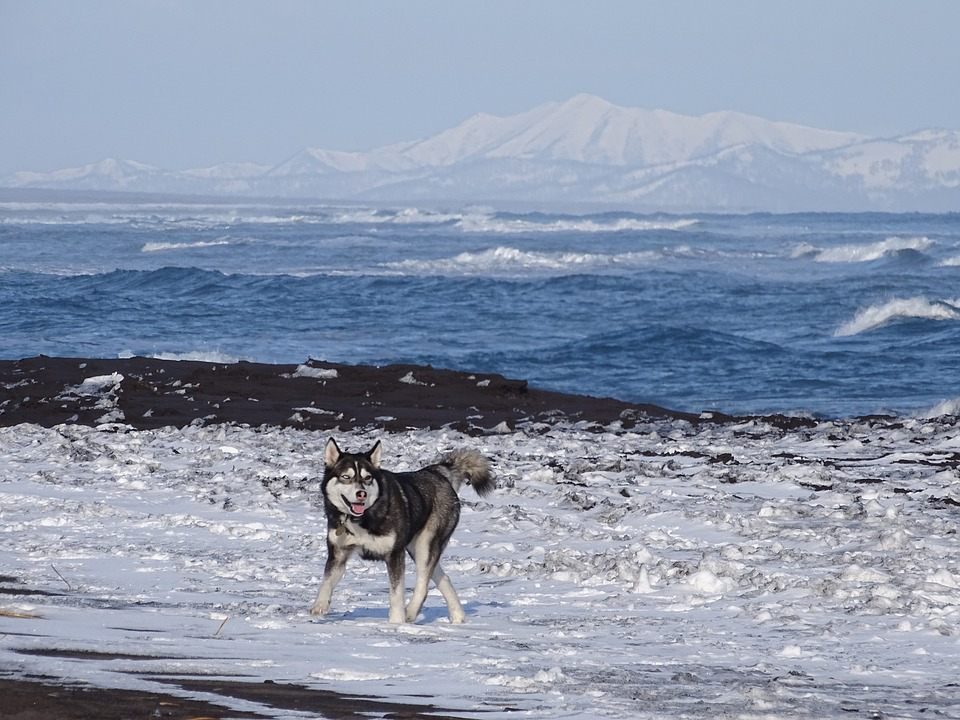

In [64]:
img

In [65]:
np.array(img).shape

(720, 960, 3)

In [66]:
img = cv2.imread('/content/image.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img = cv2.resize(img,(300,300))/255.0
image = np.expand_dims(img,axis = 0)

In [67]:
image.shape

(1, 300, 300, 3)

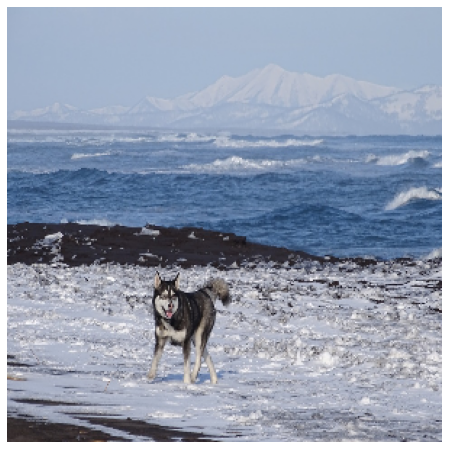

In [68]:
plt.figure(figsize = (8,8))
plt.imshow(img)
plt.axis('off')

plt.show()

In [69]:
image.shape

(1, 300, 300, 3)

In [70]:
class_index = 251
num_classes = 1001
expected_output = tf.one_hot([class_index]*image.shape[0],num_classes)
with tf.GradientTape() as tape:
    inputs = tf.cast(image,tf.float32)
    tape.watch(inputs)
    predictions = model(inputs)
    loss = tf.keras.losses.categorical_crossentropy(expected_output,predictions)
gradients = tape.gradient(loss,inputs)


In [71]:
greyscale_image  = tf.reduce_sum(tf.abs(gradients),axis = -1)
normalized_image =  tf.cast(255*   
                            (greyscale_image- tf.reduce_min(greyscale_image) )/
                            (tf.reduce_max(greyscale_image) - tf.reduce_min(greyscale_image)),
                             'uint8')

In [72]:
normalized_image.shape

TensorShape([1, 300, 300])

In [73]:
 normalized_image = tf.squeeze(normalized_image)

In [74]:
normalized_image.shape

TensorShape([300, 300])

In [75]:
greyscale_image.shape

TensorShape([1, 300, 300])

In [76]:
print(np.min(greyscale_image[0]))
print(np.max(greyscale_image[0]))

0.0
1.2166531


In [81]:
min_pixel = np.unravel_index(np.argmin(greyscale_image[0]),greyscale_image[0].shape)
max_pixel = np.unravel_index(np.argmax(greyscale_image[0]),greyscale_image[0].shape)

In [82]:
print(min_pixel,max_pixel)

(0, 299) (203, 129)


In [83]:
print(normalized_image[min_pixel])
print(normalized_image[max_pixel])

tf.Tensor(0, shape=(), dtype=uint8)
tf.Tensor(255, shape=(), dtype=uint8)


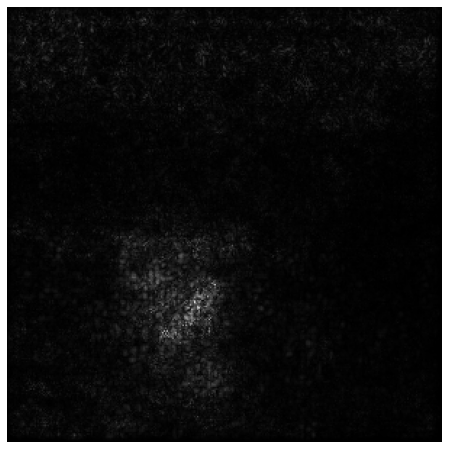

In [86]:
plt.figure(figsize = (8,8))
plt.imshow(normalized_image,cmap = 'gray')
plt.axis('off')
plt.show()

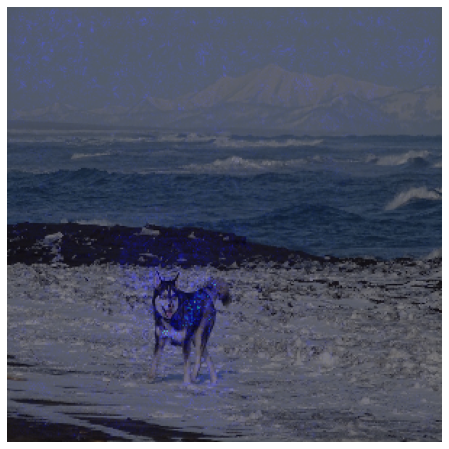

In [88]:
gradient_color = cv2.applyColorMap(normalized_image.numpy() ,cv2.COLORMAP_HOT )
gradient_color = gradient_color / 255.0
superimposed = cv2.addWeighted(img,0.5,gradient_color,0.5,0.0)
plt.figure(figsize = (8,8))
plt.imshow(superimposed)
plt.axis('off')
plt.show()